<a href="https://colab.research.google.com/github/srikannyaroy/DL-assignment/blob/main/mhc2024006_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation = 'relu'),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(256, (3, 3), activation = 'relu'),
    Conv2D(256, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer = SGD(1e-3), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,324,618 (5.05 MB)

 Trainable params: 1,324,618 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1053 - loss: 2.3018 - val_accuracy: 0.1285 - val_loss: 2.3000
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1252 - loss: 2.2995 - val_accuracy: 0.1531 - val_loss: 2.2975
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1440 - loss: 2.2968 - val_accuracy: 0.1485 - val_loss: 2.2931
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1430 - loss: 2.2922 - val_accuracy: 0.1572 - val_loss: 2.2843
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1465 - loss: 2.2809 - val_accuracy: 0.1625 - val_loss: 2.2615
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1549 - loss: 2.2492 - val_accuracy: 0.1886 - val_loss: 2.1997
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1854 - loss: 2.1925 - val_accuracy: 0.2062 - val_loss: 2.1553
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2142 - loss: 2.15

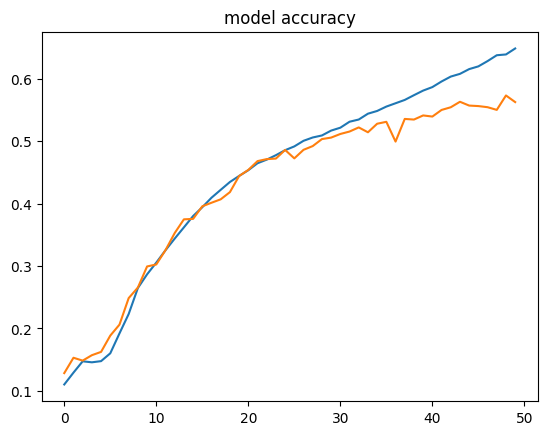

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

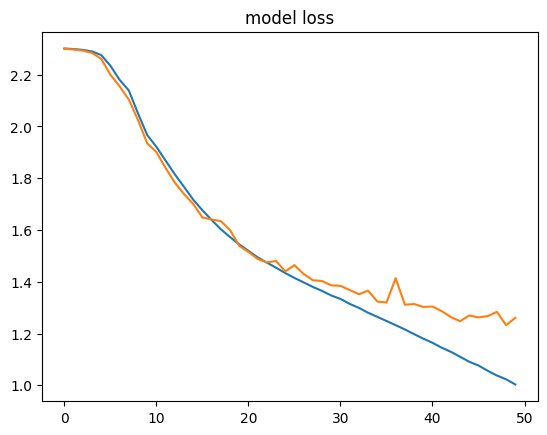

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.show()

### Decreasing LR

In [ ]:
model1.compile(optimizer = SGD(1e-4), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model1.summary()
history2 = model1.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_split = 0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,324,618 (5.05 MB)

 Trainable params: 1,324,618 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6780 - loss: 0.9240 - val_accuracy: 0.5856 - val_loss: 1.1998
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6909 - loss: 0.8994 - val_accuracy: 0.5887 - val_loss: 1.2011
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6928 - loss: 0.8959 - val_accuracy: 0.5866 - val_loss: 1.2029
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6981 - loss: 0.8745 - val_accuracy: 0.5896 - val_loss: 1.2039
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6998 - loss: 0.8852 - val_accuracy: 0.5889 - val_loss: 1.2054
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6998 - loss: 0.8761 - val_accuracy: 0.5871 - val_loss: 1.2043
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7009 - loss: 0.8742 - val_accuracy: 0.5846 - val_loss: 1.2073
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6941 - loss: 0.8875 - val_accurac

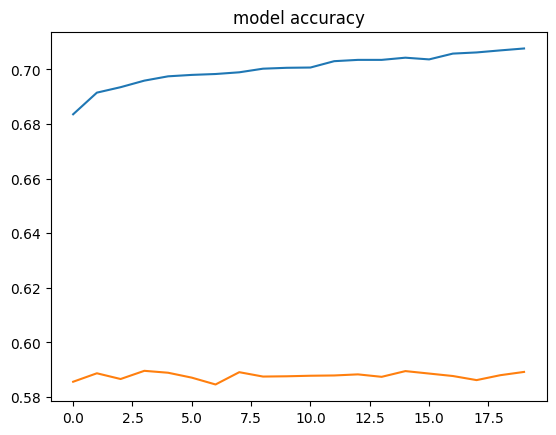

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

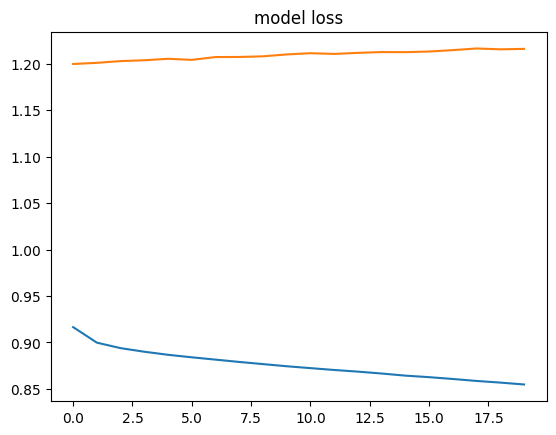

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.show()

### Increasing LR

In [ ]:
model1.compile(optimizer = SGD(1e-2), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model1.summary()
history3 = model1.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_split = 0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,324,618 (5.05 MB)

 Trainable params: 1,324,618 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3766 - loss: 2.1046 - val_accuracy: 0.5289 - val_loss: 1.3410
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5499 - loss: 1.2703 - val_accuracy: 0.5416 - val_loss: 1.2991
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5901 - loss: 1.1564 - val_accuracy: 0.5427 - val_loss: 1.2923
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6230 - loss: 1.0710 - val_accuracy: 0.5533 - val_loss: 1.2868
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6434 - loss: 1.0112 - val_accuracy: 0.5486 - val_loss: 1.2763
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6653 - loss: 0.9548 - val_accuracy: 0.5780 - val_loss: 1.2458
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6881 - loss: 0.8904 - val_accuracy: 0.5950 - val_loss: 1.1710
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7077 - loss: 0.8299 - val_accuracy

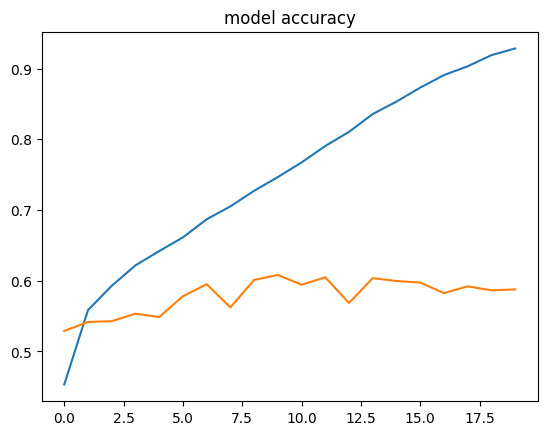

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

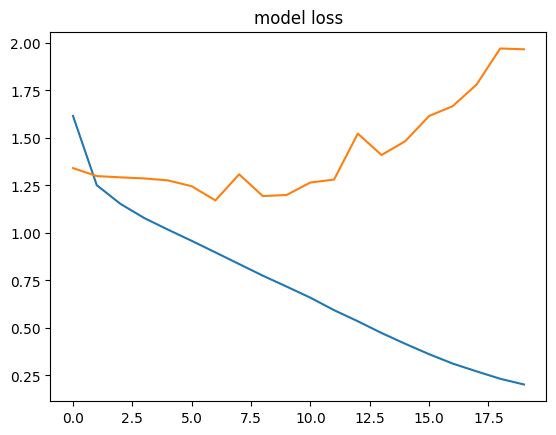

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.show()

### Effect of Dropout

In [ ]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation = 'relu'),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation = 'relu'),
    Conv2D(256, (3, 3), activation = 'relu'),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model2.compile(optimizer = SGD(1e-3), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model2.summary()
history4 = model2.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 1, 1, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,324,618 (5.05 MB)

 Trainable params: 1,324,618 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0990 - loss: 2.3039 - val_accuracy: 0.0994 - val_loss: 2.3028
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.1017 - loss: 2.3028 - val_accuracy: 0.1089 - val_loss: 2.3025
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1025 - loss: 2.3029 - val_accuracy: 0.1270 - val_loss: 2.3022
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1263 - val_loss: 2.3020
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1021 - loss: 2.3026 - val_accuracy: 0.1161 - val_loss: 2.3017
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1054 - loss: 2.3021 - val_accuracy: 0.1144 - val_loss: 2.3015
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1075 - loss: 2.3020 - val_accuracy: 0.1158 - val_loss: 2.3013
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1122 - loss: 2.3018 - val_a

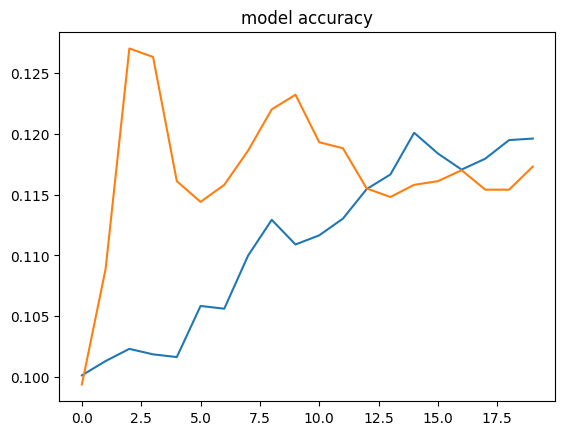

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

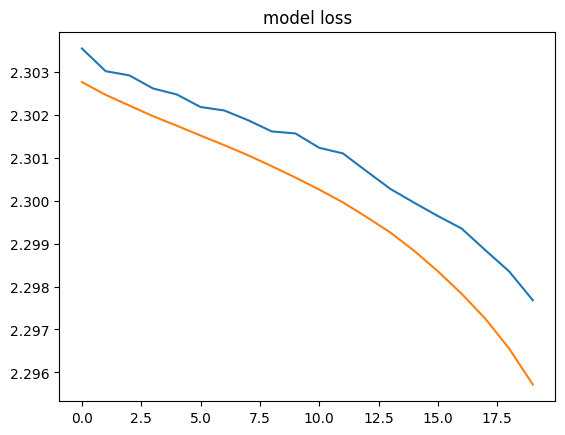

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.show()

### Pretrained Model (VGG16)

In [ ]:
model3 = Sequential([
    VGG16(include_top = False, input_shape = (32, 32, 3)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model3.compile(optimizer = Adam(1e-3), loss = CategoricalCrossentropy(), metrics = ['accuracy'])
model3.summary()
history5 = model3.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_split = 0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 14,781,642 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 113ms/step - accuracy: 0.1702 - loss: 2.2022 - val_accuracy: 0.3500 - val_loss: 1.5771
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4155 - loss: 1.4854 - val_accuracy: 0.5655 - val_loss: 1.2100
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.6100 - loss: 1.0815 - val_accuracy: 0.6423 - val_loss: 1.0197
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.7182 - loss: 0.8224 - val_accuracy: 0.7560 - val_loss: 0.7242
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.7929 - loss: 0.6251 - val_accuracy: 0.7607 - val_loss: 0.7869
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.8269 - loss: 0.5170 - val_accuracy: 0.7835 - val_loss: 0.6511
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.8637 - loss: 0.4176 - val_accuracy: 0.7904 - val_loss: 0.6654
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.8816 - loss: 0.3578 -

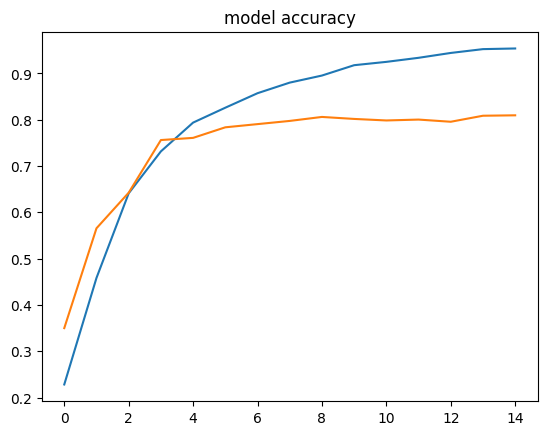

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

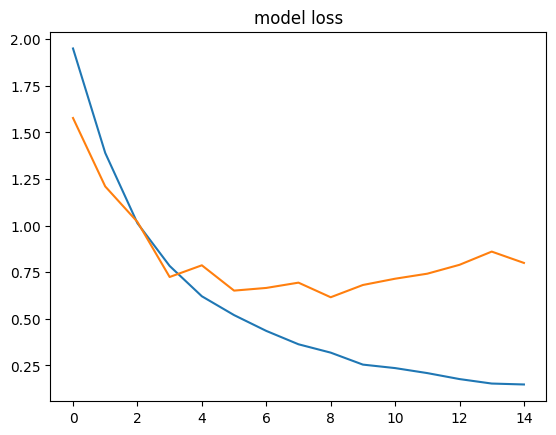

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.show()

 ### How convolution, pooling, and activation functions help in feature extraction?

 1. **Convolution** :
*  Convolution captures spatial hierarchies by scanning the input with small, localized filters, preserving the spatial relationships between pixels.
*  Filters are shared across the input, reducing the number of parameters and making the network more efficient.
*  Convolution generates feature maps that highlight important patterns in the input data.

 2. **Pooling** :
*   Pooling downsamples the feature maps, reducing computational complexity and memory usage.
*   Pooling makes the network less sensitive to small shifts or distortions in the input, improving robustness.
*  Pooling produces smaller, more manageable feature maps that focus on the most relevant features.

 2. **Activation Functions** :
*   LWithout activation functions, the network would be a linear model, incapable of learning complex features. Activation functions introduce non-linearity, allowing the network to model intricate relationships.
*   Activation functions like ReLU help mitigate the vanishing gradient problem, ensuring efficient training of deep networks.
*  Activation functions enable the network to learn and represent complex, hierarchical features.






### Why CNNs are better than fully connected networks for image classification?


CNNs outperform fully connected networks for image classification because they:
*  Preserve spatial relationships and are good at local feature extraction.
*  Extract hierarchical features efficiently.
*  Reduce the number of parameters.
*  Are translation-invariant.
*  Handle high-dimensional data effectively.
